In [ ]:
!pip install -q scikit-learn pandas matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"

df = pd.read_csv(url, sep='\t', header=None, names=['label','message'])
df.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
df['message_clean'] = df['message'].str.lower().str.strip()
df.head()


,label,message,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."


In [ ]:
X = df['message_clean']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 4457
Test size: 1115


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape

((4457, 7403), (1115, 7403))

In [ ]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9704035874439462

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



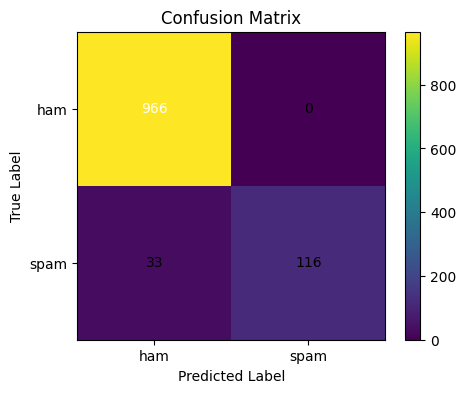

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=['ham','spam'])

plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ['ham','spam'])
plt.yticks([0,1], ['ham','spam'])

for (i, j), val in np.ndenumerate(cm):
    plt.text(j, i, val, ha='center', va='center', color='white' if val>cm.max()/2 else 'black')

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
def predict_message(text):
    text_clean = text.lower().strip()
    vect = vectorizer.transform([text_clean])
    pred = model.predict(vect)[0]
    prob = model.predict_proba(vect).max()
    return pred, prob

# Try your messages here
tests = [
    "You won a free gift!!! Click now!",
    "Hey bro, are you coming today?",
    "Free recharge offer! Claim now"
]

for msg in tests:
    label, prob = predict_message(msg)
    print(f"\nMessage: {msg}\nPredicted: {label}  (confidence {prob:.2f})")


Message: You won a free gift!!! Click now!
Predicted: ham  (confidence 0.50)

Message: Hey bro, are you coming today?
Predicted: ham  (confidence 0.99)

Message: Free recharge offer! Claim now
Predicted: spam  (confidence 0.60)
